In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [11]:
class AgentState(TypedDict):
    name : str
    age : str
    final: str

In [12]:
def first_node(state: AgentState) -> AgentState:
    """First node in the graph. sequence"""
    
    state["final"] = f"Hi {state["name"]}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """Second node in the graph. sequence"""
    
    state["final"] = state["final"] + f" You are {state["age"]} years old."
    return state

In [13]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

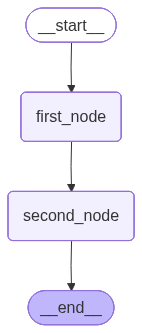

In [14]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
result = app.invoke({"name" : "Fitiavana" , "age" : 20})

In [16]:
result

{'name': 'Fitiavana',
 'age': 20,
 'final': 'Hi Fitiavana! You are 20 years old.'}